In [1]:
#Importing all the necessary laibraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data
train_df= pd.read_excel("C:\\Users\\samir\\OneDrive\\Desktop\\Data_Train.xlsx")
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
#Checking shape of data 
train_df.shape

(10683, 11)

In [4]:
#Checking is their is any null values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Droping the nan in route column as we can not fill the nan with mean bwcause every airline has its own route 

In [5]:
#Droping NaN values
train_df.dropna(inplace=True)

In [6]:
train_df.shape

(10682, 11)

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

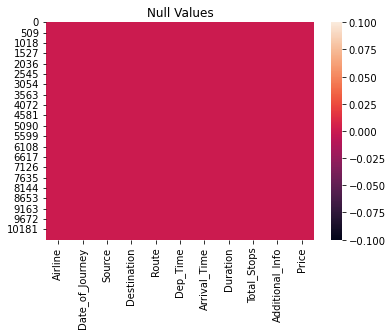

In [8]:
#again checking the null values by heatmap
sns.heatmap(train_df.isnull())
plt.title("Null Values")
plt.show()

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
#Finding the duplicates values
train_df[train_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303


In [11]:
#Removing the repeated values from the dataset and keeping inplace =true so that their will no change in data 
train_df.drop_duplicates(keep='first',inplace=True)
train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


# EDA 
we can see that date_of_journey is a oject data type.
soo first we need to convert it into timestamp to use this column properly for model prediction.
For converting date_of_journey data type we are using  "to_datetime". 

In [12]:
train_df["Day"]=pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.day  #dt.day will extract only day
train_df["Month"]=pd.to_datetime(train_df.Date_of_Journey, format="%d/%m/%Y").dt.month  # dt.day will extract month only
#Year is same so we are not using it 
#droping the Date_of_Journey column
train_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [13]:
#Changing the formate of Dep_Time by using .to_datetime
train_df["Dep_hour"]=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df["Dep_min"]=pd.to_datetime(train_df['Dep_Time']).dt.minute
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [14]:
#Changing the formate of Arrival_Time by using .to_datetime
train_df["Arriv_hour"]=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df["Arriv_min"]=pd.to_datetime(train_df['Arrival_Time']).dt.minute
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [15]:
#Converting hours in minutes  
train_df['Duration'] = train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [16]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


In [17]:
#checking diffrent airline
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
#Checking diffrent route
train_df["Route"].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

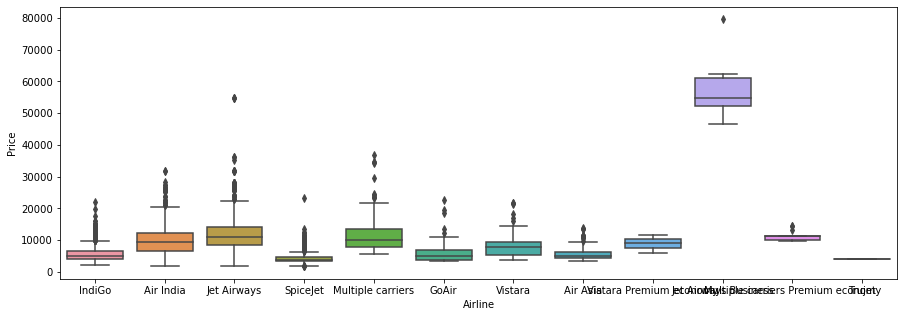

In [19]:
plt.figure(figsize=[15,5])
sns.boxplot(x='Airline',y='Price',data=train_df)
plt.show()

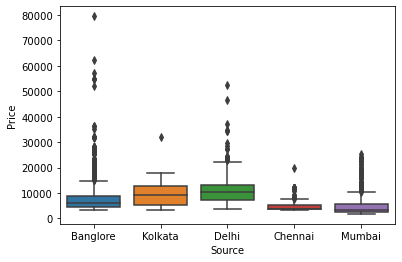

In [20]:
sns.boxplot(x='Source',y='Price',data=train_df)
plt.show()

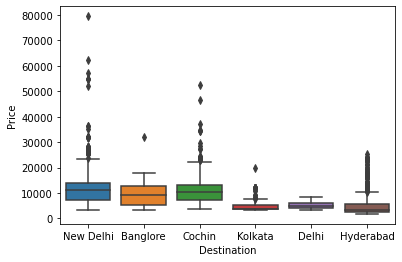

In [21]:
sns.boxplot(x='Destination',y='Price',data=train_df)
plt.show()

In [22]:
train_df["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10462, dtype: object

AS we can see Additional_Info has 80% of no data....And Route and Total_stops are doing the same thing as for example see index 1 in Route 
there is two stopage between kokata to Banglore and Total_stops also showing two stops ...Soo let's drop both Additional_Info and Route column

In [23]:
train_df=train_df.drop(columns=['Additional_Info','Route'],axis=1)
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35


In [24]:
from sklearn.preprocessing import LabelEncoder
#Using LebelEncoder to cahange the str datatype
leb=LabelEncoder()
df2=['Airline','Source','Destination','Total_Stops']

In [25]:
#Encoding multiple column at once
train_df[df2]=train_df[df2].apply(LabelEncoder().fit_transform)
train_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,3,0,5,170,4,3897,24,3,22,20,1,10
1,1,3,0,445,1,7662,1,5,5,50,13,15
2,4,2,1,1140,1,13882,9,6,9,25,4,25
3,3,3,0,325,0,6218,12,5,18,5,23,30
4,3,0,5,285,0,13302,1,3,16,50,21,35


In [26]:
train_df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Price,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
count,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000,10462.000000
mean,3.981074,1.953642,1.439495,629.781591,1.463105,9026.790289,13.463200,4.701491,12.478494,24.404989,13.387689,24.719939
std,2.364627,1.186327,1.481015,500.699045,1.821371,4624.849541,8.467493,1.163802,5.727227,18.815719,6.855547,16.570450
min,0.000000,0.000000,0.000000,5.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,170.000000,0.000000,5224.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,505.000000,0.000000,8266.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,910.000000,4.000000,12344.750000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,2860.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [27]:
train_df.shape

(10462, 12)

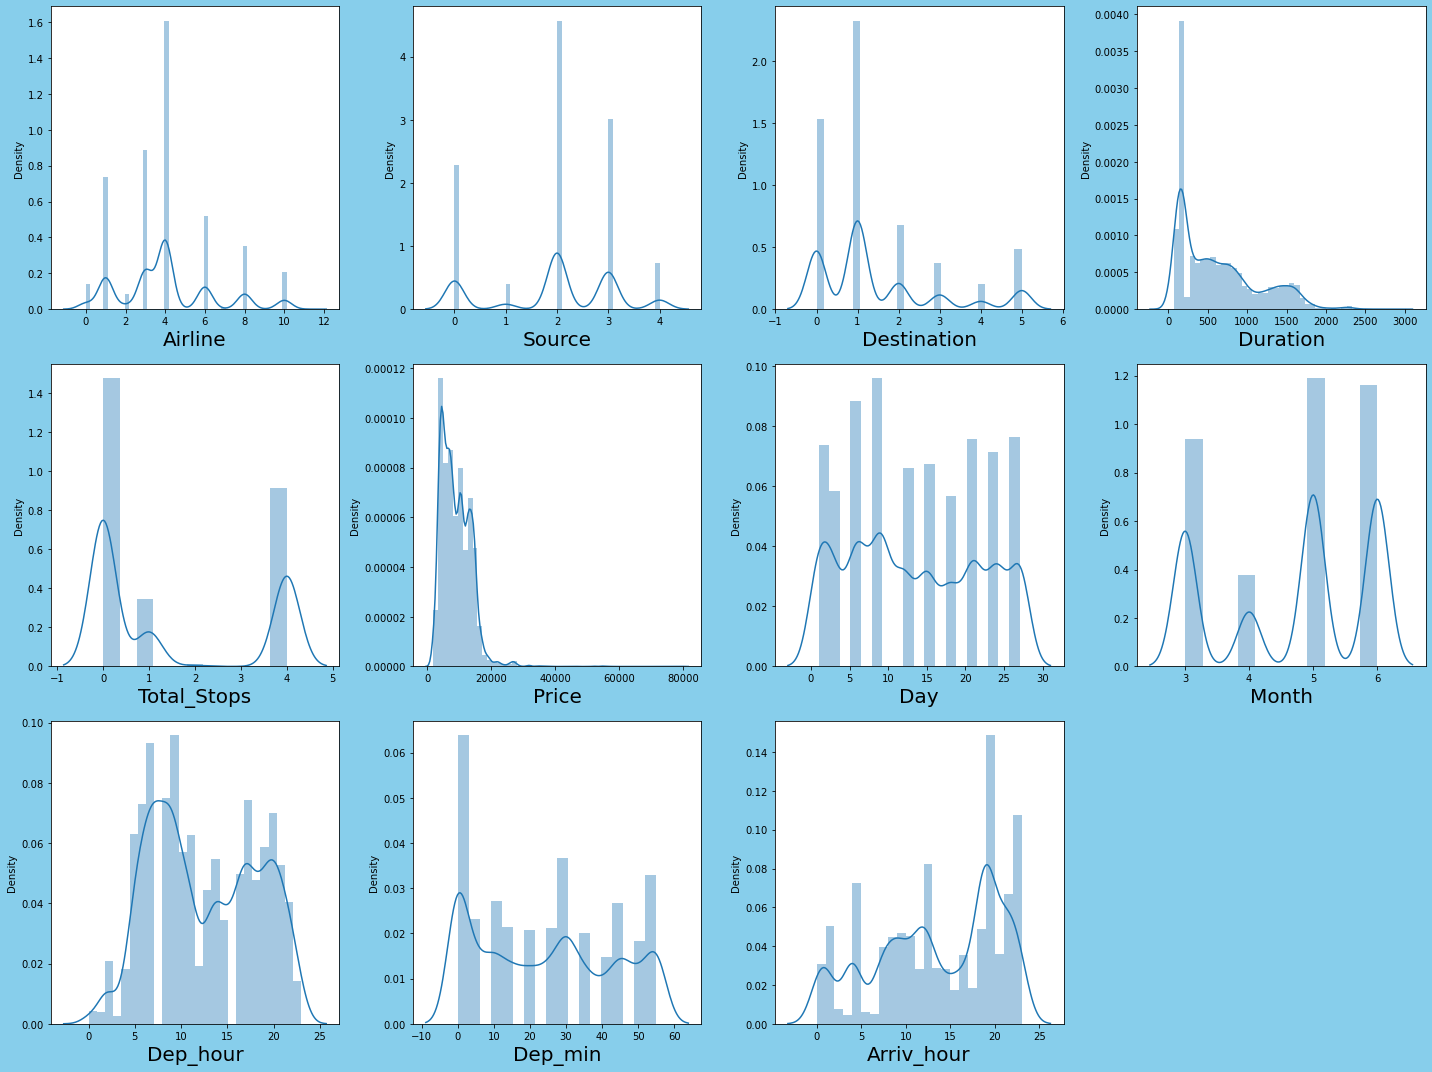

In [28]:
#Lets see hw data is distributed for each column
plt.figure(figsize=(20,15),facecolor='skyblue')
plotnumber=1
for column in train_df:
    if plotnumber<12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(train_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [29]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Day', 'Month', 'Dep_hour', 'Dep_min', 'Arriv_hour', 'Arriv_min'],
      dtype='object')

In [30]:
train_df.skew()

Airline        0.723567
Source        -0.419669
Destination    1.225081
Duration       0.903973
Total_Stops    0.617105
Price          1.857490
Day            0.124628
Month         -0.377535
Dep_hour       0.108306
Dep_min        0.171301
Arriv_hour    -0.378978
Arriv_min      0.110802
dtype: float64

In [31]:
features=['Airline','Source','Destination','Duration','Total_Stops','Month','Arriv_hour']

In [32]:
#Using Yeo-Johnson to deal with skewness beacuse our dataset have both +ve and-ve skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
train_df[features]=pt.fit_transform(train_df[features])

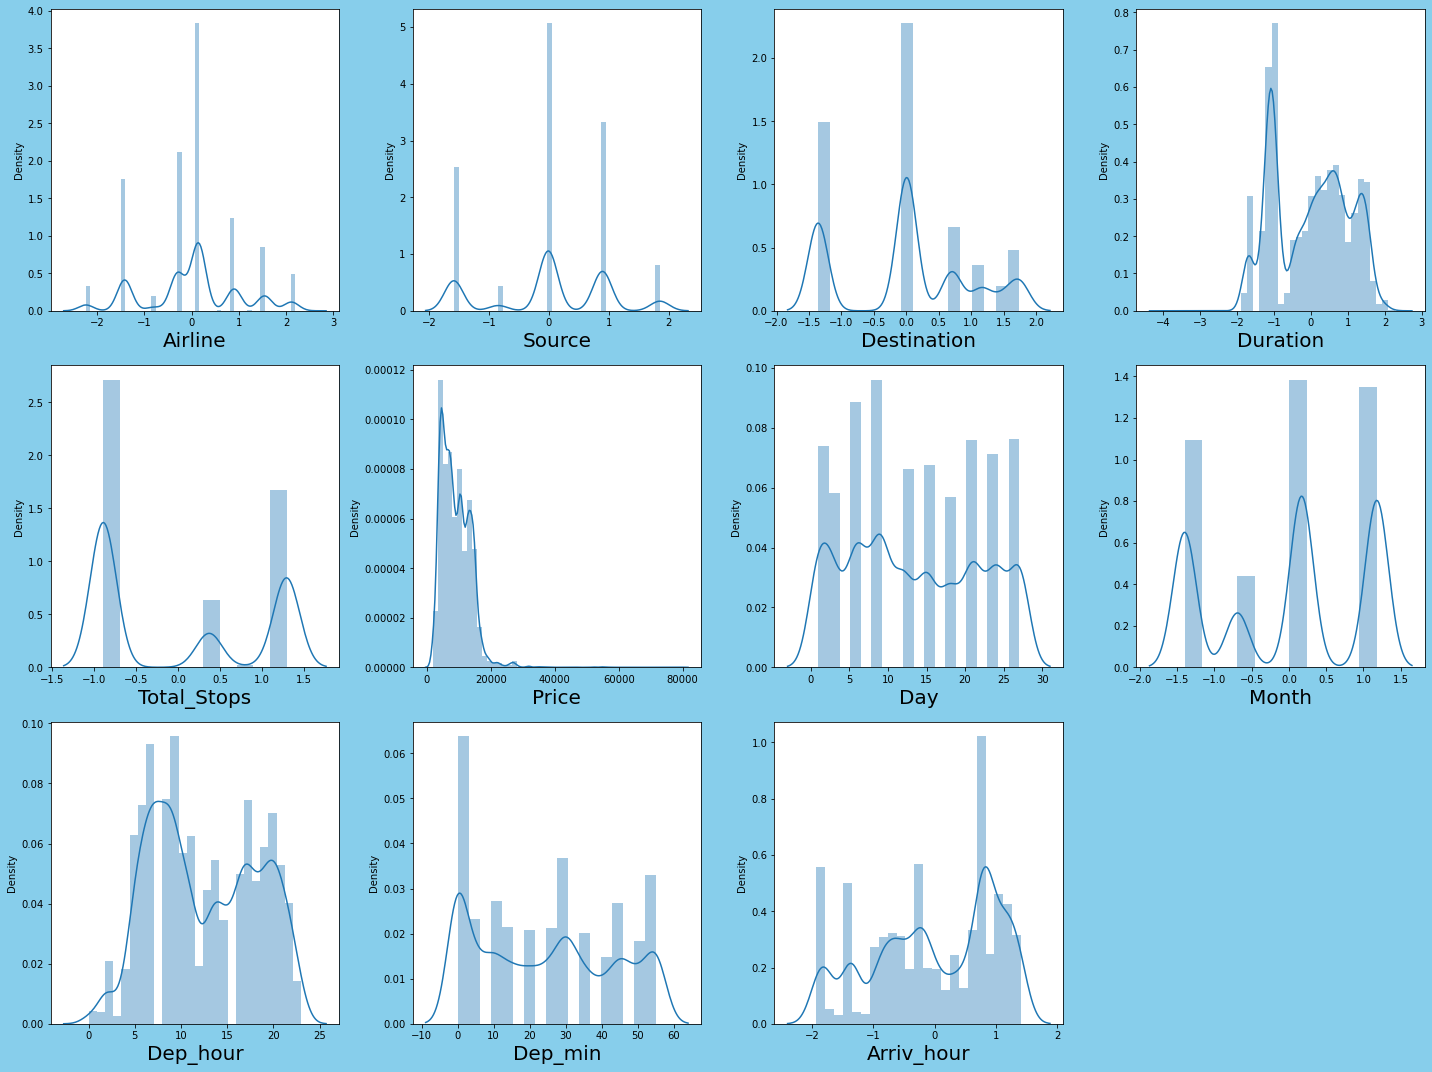

In [33]:
#Lets see hw data is distributed for each column
plt.figure(figsize=(20,15),facecolor='skyblue')
plotnumber=1
for column in train_df:
    if plotnumber<12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(train_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [34]:
train_df.shape

(10462, 12)

# Working on Test dataset

In [35]:
test_df=pd.read_excel("C:\\Users\\samir\\OneDrive\\Desktop\\Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [36]:
#Checking shape of data 
test_df.shape

(2671, 10)

In [37]:
#Checking is their is any null values
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

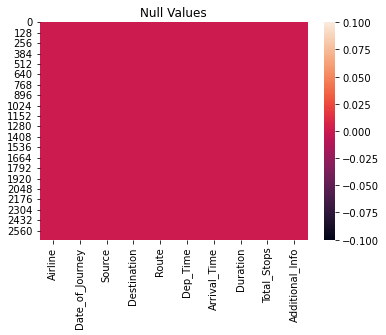

In [38]:
#again checking the null values by heatmap
sns.heatmap(test_df.isnull())
plt.title("Null Values")
plt.show()

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [40]:
#Finding the duplicates values
test_df[test_df.duplicated()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info


In [41]:
#Removing the repeated values from the dataset and keeping inplace =true so that their will no change in data 
test_df.drop_duplicates(keep='first',inplace=True)
test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


# EDA

we can see that date_of_journey is a oject data type. soo first we need to convert it into timestamp to use this column properly for model prediction. For converting date_of_journey data type we are using "to_datetime".

In [42]:
test_df["Day"]=pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.day  #dt.day will extract only day
test_df["Month"]=pd.to_datetime(test_df.Date_of_Journey, format="%d/%m/%Y").dt.month  # dt.day will extract month only
#Year is same so we are not using it 
#droping the Date_of_Journey column
test_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [43]:
#Changing the formate of Dep_Time by using .to_datetime
test_df["Dep_hour"]=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df["Dep_min"]=pd.to_datetime(test_df['Dep_Time']).dt.minute
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [44]:
#Changing the formate of Arrival_Time by using .to_datetime
test_df["Arriv_hour"]=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df["Arriv_min"]=pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [45]:
#Converting hours in minutes  
test_df['Duration'] = test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [46]:
test_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [47]:
#checking diffrent airline
test_df["Airline"].unique()

array(['Jet Airways', 'IndiGo', 'Multiple carriers', 'Air Asia',
       'Air India', 'Vistara', 'SpiceJet', 'Vistara Premium economy',
       'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business'], dtype=object)

In [48]:
#Checking diffrent route
test_df["Route"].unique()

array(['DEL → BOM → COK', 'CCU → MAA → BLR', 'BLR → DEL',
       'BLR → TRV → DEL', 'CCU → HYD → BLR', 'CCU → BLR',
       'CCU → BOM → BLR', 'DEL → MAA → BOM → COK', 'DEL → HYD → COK',
       'BLR → BOM → DEL', 'CCU → DEL → BLR', 'DEL → JAI → BOM → COK',
       'DEL → BHO → BOM → COK', 'BOM → HYD', 'CCU → PNQ → BLR',
       'MAA → CCU', 'CCU → BOM → COK → BLR', 'DEL → BLR → COK',
       'DEL → HYD → MAA → COK', 'DEL → MAA → COK',
       'CCU → IXR → BBI → BOM → BLR', 'CCU → DEL → AMD → BLR',
       'DEL → COK', 'CCU → JAI → BOM → BLR', 'DEL → LKO → COK',
       'CCU → IXB → BLR', 'DEL → CCU → BOM → COK',
       'CCU → GAU → DEL → BLR', 'BLR → COK → DEL',
       'BLR → BOM → NAG → DEL', 'CCU → BBI → BOM → BLR',
       'BLR → AMD → DEL', 'BOM → DEL → HYD', 'DEL → GOI → BOM → COK',
       'DEL → IXU → BOM → COK', 'DEL → HYD → BOM → COK',
       'CCU → DEL → COK → BLR', 'BLR → GOI → DEL',
       'BLR → BOM → BHO → DEL', 'DEL → IDR → BOM → COK',
       'DEL → AMD → BOM → COK', 'DEL → RPR →

In [49]:
test_df["Additional_Info"]

0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2645, dtype: object

AS we can see Additional_Info has 80% of no data....And Route and Total_stops are doing the same thing as for example see index 1 in Route 
there is two stopage between kokata to Banglore and Total_stops also showing two stops ...Soo let's drop both Additional_Info and Route column

In [50]:
test_df=test_df.drop(columns=['Additional_Info','Route'],axis=1)
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,Jet Airways,Delhi,Cochin,655,1 stop,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1 stop,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1 stop,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1 stop,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,non-stop,24,6,23,55,2,45


In [51]:
from sklearn.preprocessing import LabelEncoder
#Using LebelEncoder to cahange the str datatype
leb=LabelEncoder()
df2=['Airline','Source','Destination','Total_Stops']
#Encoding multiple column at once
test_df[df2]=test_df[df2].apply(LabelEncoder().fit_transform)
test_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
0,4,2,1,655,0,6,6,17,30,4,25
1,3,3,0,240,0,12,5,6,20,10,20
2,4,2,1,1425,0,21,5,19,15,19,0
3,6,2,1,780,0,21,5,8,0,21,0
4,0,0,2,170,4,24,6,23,55,2,45


In [52]:
test_df.describe()

,Airline,Source,Destination,Duration,Total_Stops,Day,Month,Dep_hour,Dep_min,Arriv_hour,Arriv_min
count,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000,2645.000000
mean,3.979962,1.963705,1.430624,635.640832,1.424953,12.908129,4.715690,12.615879,24.896030,13.597353,24.559546
std,2.299275,1.186554,1.465761,500.942413,1.801239,8.267572,1.170134,5.679266,19.088499,7.025676,16.794025
min,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,175.000000,0.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,515.000000,0.000000,12.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,6.000000,3.000000,2.000000,910.000000,4.000000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,10.000000,4.000000,5.000000,2440.000000,4.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [53]:
test_df.shape

(2645, 11)

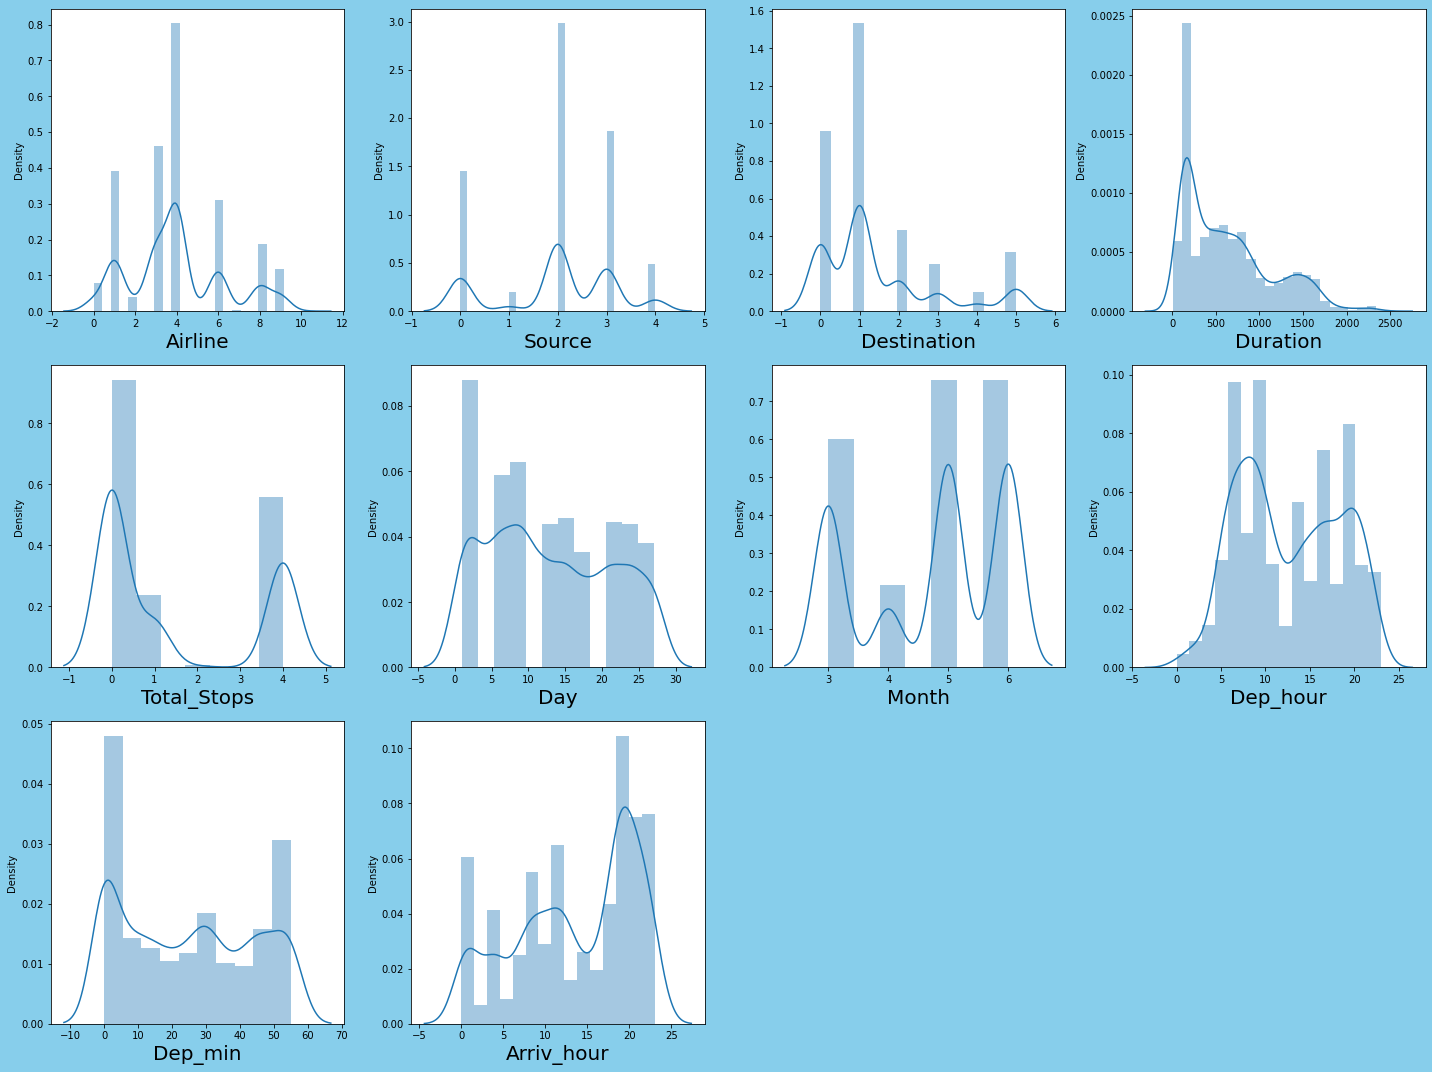

In [54]:
#Lets see hw data is distributed for each column
plt.figure(figsize=(20,15),facecolor='skyblue')
plotnumber=1
for column in test_df:
    if plotnumber<11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(test_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [55]:
test_df.skew()

Airline        0.482621
Source        -0.424718
Destination    1.260252
Duration       0.913735
Total_Stops    0.666765
Day            0.201535
Month         -0.400537
Dep_hour       0.089146
Dep_min        0.129932
Arriv_hour    -0.447350
Arriv_min      0.113229
dtype: float64

In [56]:
features=['Airline','Source','Destination','Duration','Total_Stops','Month','Arriv_hour']

In [57]:
#Using Yeo-Johnson to deal with skewness beacuse our dataset have both +ve and-ve skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
train_df[features]=pt.fit_transform(train_df[features])

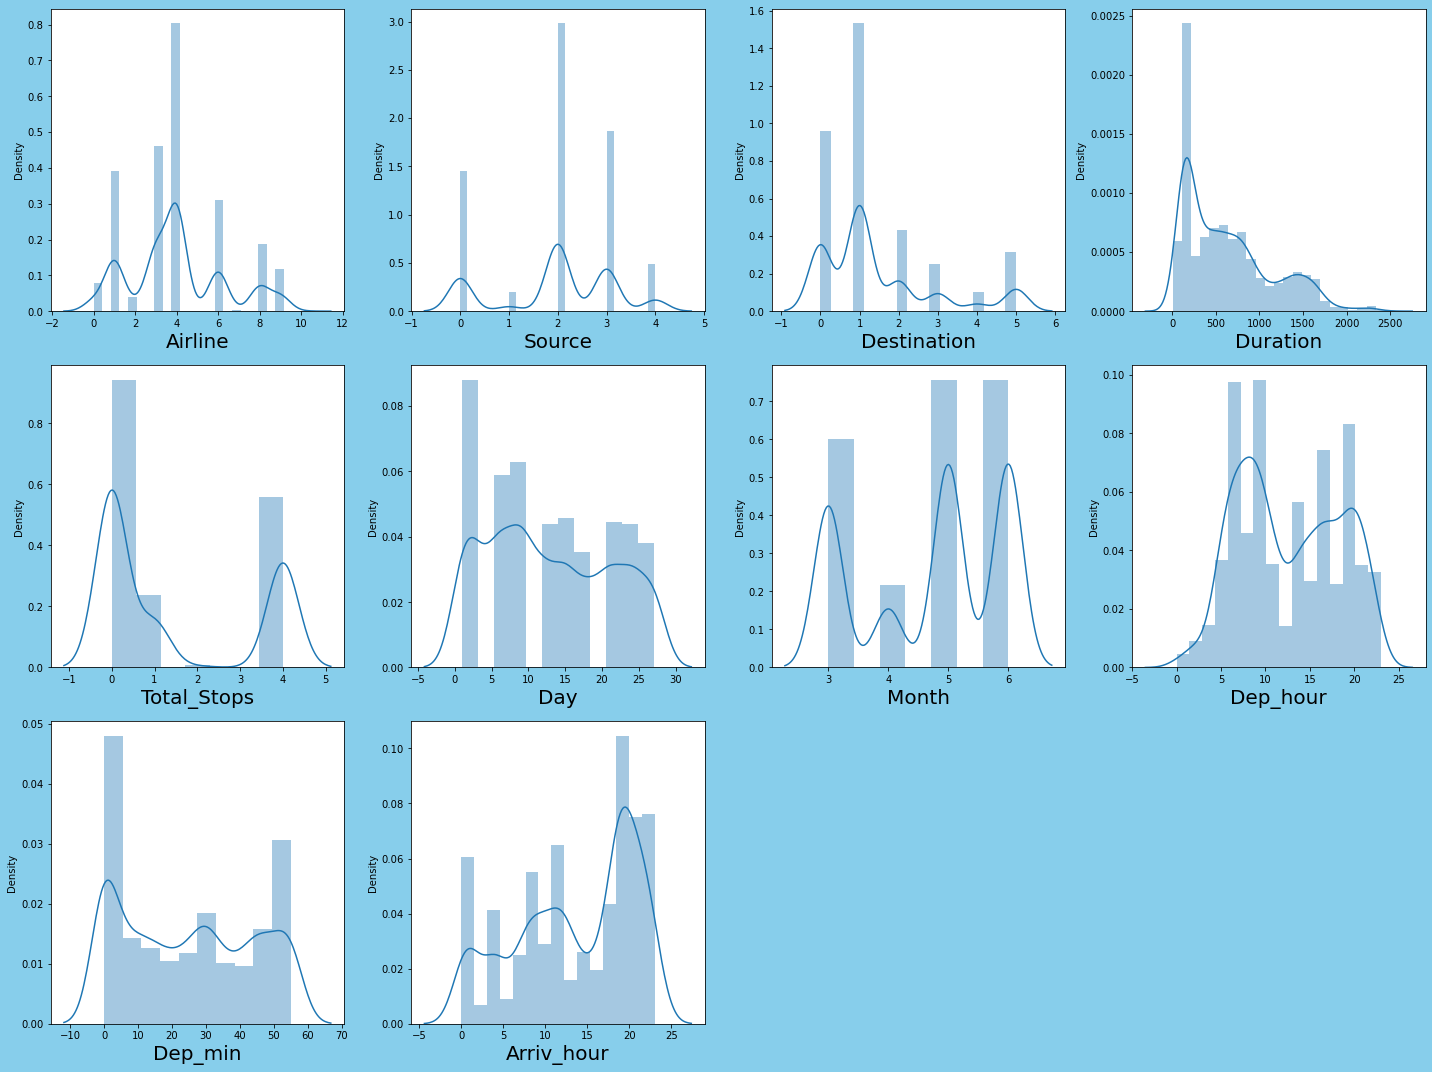

In [58]:
#Lets see hw data is distributed for each column
plt.figure(figsize=(20,15),facecolor='skyblue')
plotnumber=1
for column in test_df:
    if plotnumber<11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(test_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Feature Selection

In [59]:
train_df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'Day', 'Month', 'Dep_hour', 'Dep_min', 'Arriv_hour', 'Arriv_min'],
      dtype='object')

In [60]:
x=train_df.drop(['Price'],axis=1)

In [61]:
y=train_df['Price']

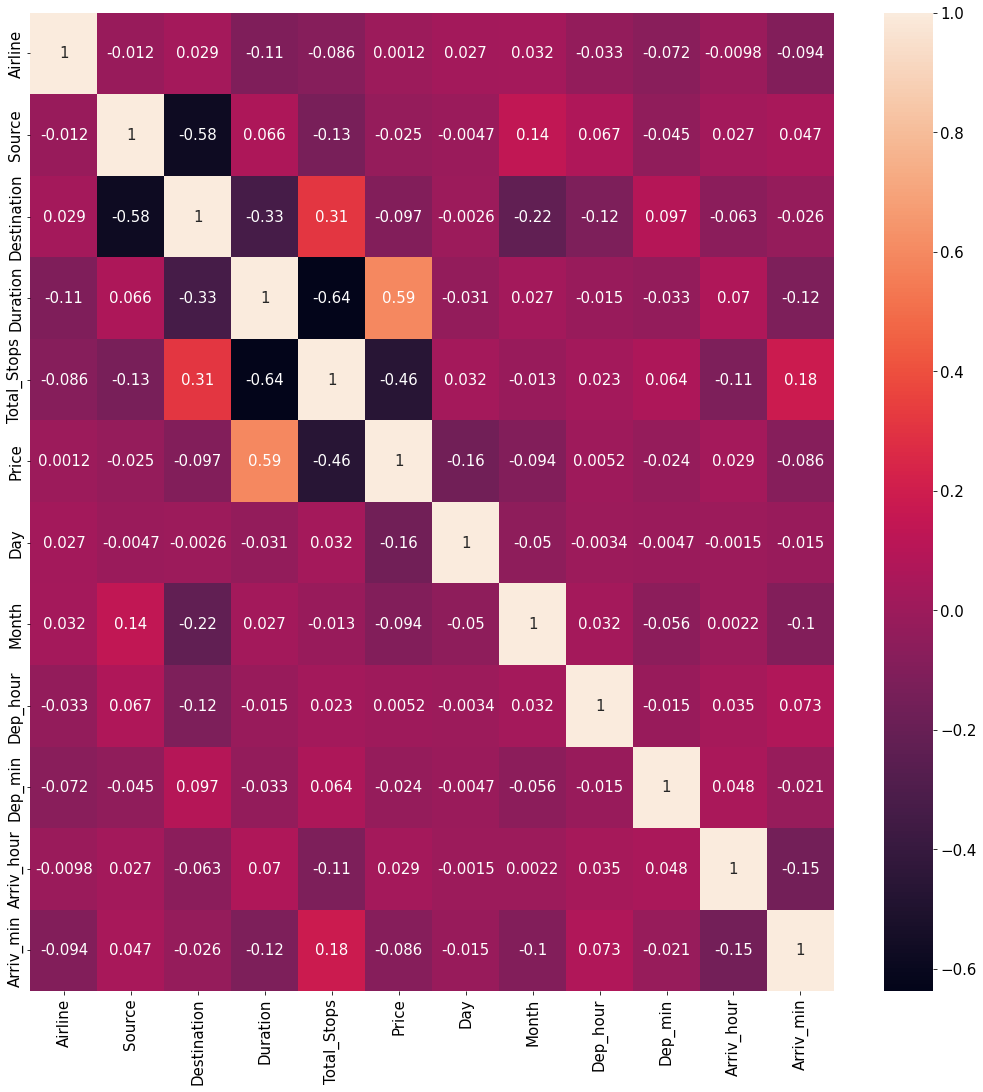

In [62]:
#Finding the correlation between independent and dependent attributes
plt.figure(figsize=(18,18))
plt.rcParams['font.size'] = 15
sns.heatmap(train_df.corr(),annot=True)
plt.show()

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=64)

# Using RandomForestRegressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [65]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [66]:
y_pred=rf.predict(x_test)
y_pred

array([12932.82833333,  6795.61      ,  6959.53      , ...,
        4749.58      , 13419.59      ,  4626.355     ])

In [67]:
rf.score(x_train,y_train)

0.9541563388352442

In [68]:
rf.score(x_test,y_test)

0.8039658680445958

In [69]:
from sklearn import metrics

In [70]:
metrics.r2_score(y_test,y_pred)

0.8039658680445958

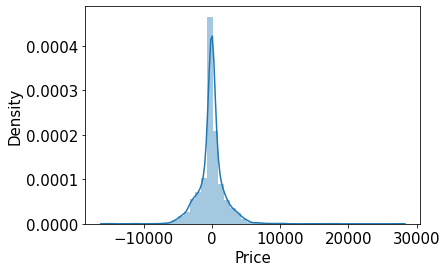

In [71]:
sns.distplot(y_test-y_pred)
plt.show()

# Using LinearRegression

In [72]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [73]:
r_pred=regression.predict(x_test)
r_pred

array([13101.12540374,  9410.63116592,  9713.78775767, ...,
        6044.1175812 , 12312.64307961,  4043.62004854])

In [74]:
regression.score(x_train,y_train)

0.4006282127583294

In [75]:
regression.score(x_test,y_test)

0.4311875406956097

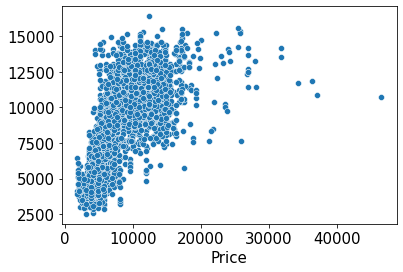

In [76]:
sns.scatterplot(y_test,r_pred)
plt.show()

# Saving the RandomForestRegressor model to reuse

In [133]:
import pickle
file='flight_fare.pkl'
pickle.dump(rf,open(file,'wb'))

In [134]:
load=pickle.load(open(file,'rb'))

In [137]:
y_prediction=rf.predict(x_test)

In [139]:
metrics.r2_score(y_test,y_prediction)

0.8039658680445958